In [43]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.sfgov.org",
                 "gZmg4iarmENBTk1Vzsb94bnse",
                 username="xinyulia@kth.se",
                 password="Xw990504")

results = client.get("wg3w-h783", limit=800000)

results_df = pd.DataFrame.from_records(results)

In [44]:
from preprocessor_pipeline import preprocessing_incident
results_df_preprocessed = preprocessing_incident(results_df)

In [45]:
results_df_preprocessed.incident_datetime=pd.to_datetime(results_df_preprocessed.incident_datetime)

In [46]:
results_df_preprocessed.sort_values(by='incident_datetime', ascending = False, inplace = True)

In [47]:
results_df_preprocessed=results_df_preprocessed[:100]

In [48]:
results_df_preprocessed

,incident_day_of_week_Friday,incident_day_of_week_Monday,incident_day_of_week_Saturday,incident_day_of_week_Sunday,incident_day_of_week_Thursday,incident_day_of_week_Tuesday,incident_day_of_week_Wednesday,report_type_code_II,report_type_code_IS,report_type_code_VI,...,police_district_Southern,police_district_Taraval,police_district_Tenderloin,incident_datetime,incident_category,latitude,longitude,incident_month,incident_year,incident_hour
621309,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2023-01-05 22:30:00,Missing Person,37.795737,-122.423413,1,2023,22
643710,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2023-01-05 22:30:00,Non-Criminal,37.795737,-122.423413,1,2023,22
643672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,2023-01-05 22:01:00,Traffic and Vehicle Offense,37.780006,-122.411933,1,2023,22
643922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2023-01-05 21:45:00,Non-Criminal,37.743883,-122.383118,1,2023,21
643825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2023-01-05 19:30:00,Other Offenses,37.716942,-122.479981,1,2023,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643668,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2023-01-05 07:56:00,Traffic and Vehicle Offense,37.771724,-122.416900,1,2023,7
643733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2023-01-05 07:56:00,Weapons Offense,37.771724,-122.416900,1,2023,7
643919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2023-01-05 06:57:00,Other,37.727447,-122.441103,1,2023,6
643708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2023-01-05 06:46:00,Non-Criminal,37.760889,-122.435001,1,2023,6


In [49]:
import hopsworks
import joblib
import xgboost as xgb

project = hopsworks.login()
fs = project.get_feature_store()

mr = project.get_model_registry()
model = mr.get_model("incident_modal", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/incident_model.pkl")

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/5297
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.

In [50]:
batch_data = results_df_preprocessed
batch_data.drop(columns=['incident_datetime','incident_category'], inplace=True)
y_pred = model.predict(batch_data)

In [58]:
batch_data

,incident_day_of_week_Friday,incident_day_of_week_Monday,incident_day_of_week_Saturday,incident_day_of_week_Sunday,incident_day_of_week_Thursday,incident_day_of_week_Tuesday,incident_day_of_week_Wednesday,report_type_code_II,report_type_code_IS,report_type_code_VI,...,police_district_Park,police_district_Richmond,police_district_Southern,police_district_Taraval,police_district_Tenderloin,latitude,longitude,incident_month,incident_year,incident_hour
621309,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.795737,-122.423413,1,2023,22
643710,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.795737,-122.423413,1,2023,22
643672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,37.780006,-122.411933,1,2023,22
643922,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.743883,-122.383118,1,2023,21
643825,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,37.716942,-122.479981,1,2023,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643668,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,37.771724,-122.416900,1,2023,7
643733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,37.771724,-122.416900,1,2023,7
643919,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.727447,-122.441103,1,2023,6
643708,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,37.760889,-122.435001,1,2023,6


In [76]:
import numpy as np
temp_input = np.array([[1.0,0.0,0.0,0.0,0.0,0.0,0.0,
                 0.0,1.0,0.0,0.0,
                 1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
                 37.711111,-122.422222,1, 2023,0]])

In [99]:
temp_url="https://raw.githubusercontent.com/Hope-Liang/ID2223Project/main/images/" + "Theft and Robbery" + ".png"

In [100]:
from PIL import Image
img = Image.open(requests.get(temp_url, stream=True).raw)

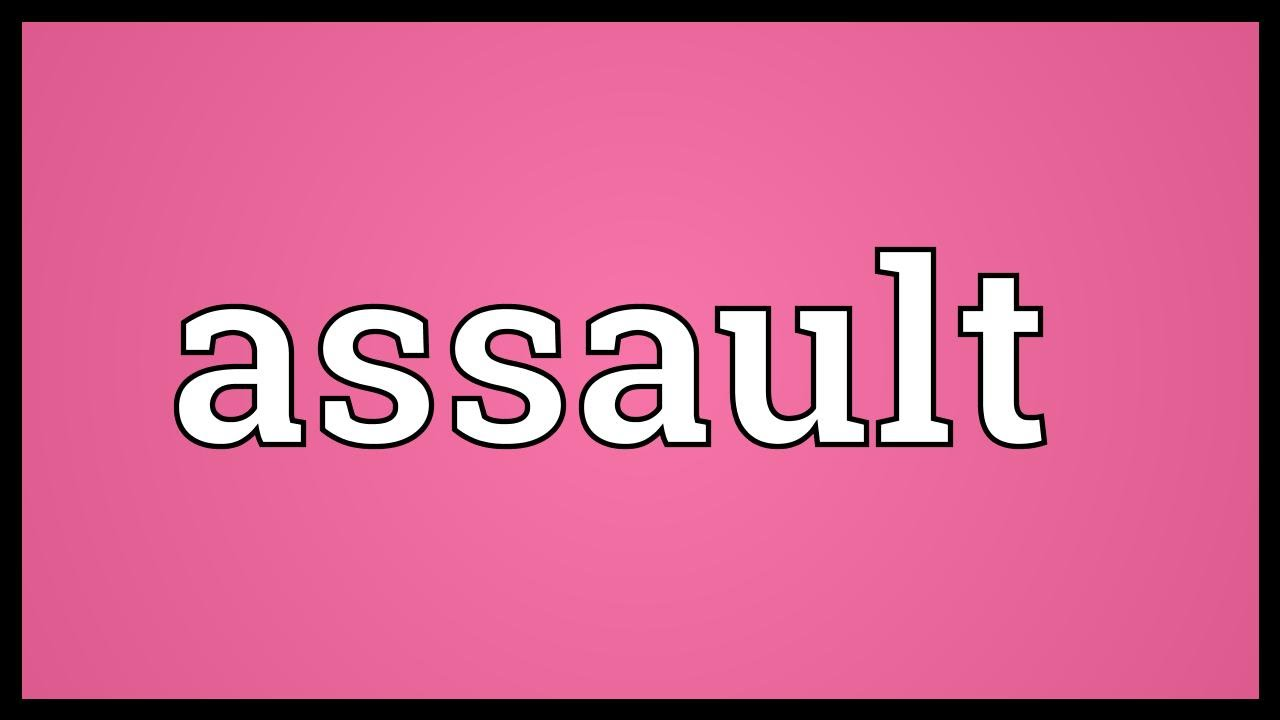

In [101]:
img

In [51]:
y_pred

array(['Theft and Robbery', 'Theft and Robbery', 'Assault', 'Other',
       'Traffic and Vehicle Offense', 'Theft and Robbery',
       'Theft and Robbery', 'Theft and Robbery', 'Malicious Mischief',
       'Theft and Robbery', 'Theft and Robbery', 'Theft and Robbery',
       'Theft and Robbery', 'Theft and Robbery', 'Theft and Robbery',
       'Theft and Robbery', 'Traffic and Vehicle Offense', 'Non-Criminal',
       'Theft and Robbery', 'Theft and Robbery', 'Drug Offense',
       'Drug Offense', 'Drug Offense', 'Theft and Robbery',
       'Non-Criminal', 'Traffic and Vehicle Offense', 'Theft and Robbery',
       'Other', 'Theft and Robbery', 'Theft and Robbery', 'Drug Offense',
       'Non-Criminal', 'Drug Offense', 'Drug Offense', 'Drug Offense',
       'Traffic and Vehicle Offense', 'Warrant',
       'Traffic and Vehicle Offense', 'Warrant', 'Warrant',
       'Traffic and Vehicle Offense', 'Non-Criminal', 'Theft and Robbery',
       'Theft and Robbery', 'Non-Criminal', 'Traffic and 

In [3]:
results_df.drop(columns=['incident_date','incident_time', 'incident_year','report_datetime','row_id','incident_id',
                         'incident_number','report_type_description','filed_online','incident_code','incident_subcategory',
                         'incident_description','resolution','cad_number','intersection','cnn','analysis_neighborhood',
                         'supervisor_district','point',':@computed_region_jwn9_ihcz',':@computed_region_26cr_cadq',
                         ':@computed_region_qgnn_b9vv',':@computed_region_nqbw_i6c3',':@computed_region_h4ep_8xdi',
                         ':@computed_region_n4xg_c4py',':@computed_region_jg9y_a9du'], inplace=True)

In [4]:
results_df.dropna(inplace=True)

In [16]:
numeric_columns = results_df_preprocessed.columns.drop(['incident_datetime','incident_category'])
results_df_preprocessed[numeric_columns] = results_df_preprocessed[numeric_columns].apply(pd.to_numeric)
results_df_preprocessed['incident_datetime'] = results_df_preprocessed['incident_datetime'].apply(pd.to_datetime)
results_df_preprocessed.rename(columns={"police_district_Out of SF": "police_district_OutOfSF"},inplace=True)
#results_df_preprocessed.astype("float64").dtypes

In [22]:
results_df['incident_month']=pd.to_datetime(results_df["incident_datetime"]).dt.month
results_df['incident_year']=pd.to_datetime(results_df["incident_datetime"]).dt.year
results_df['incident_hour']=pd.to_datetime(results_df["incident_datetime"]).dt.hour
#results_df['incident_dayofweek']=pd.to_datetime(results_df["incident_datetime"]).dt.dayofweek

In [30]:
results_df=results_df.astype({'latitude': 'float64', 'longitude': 'float64'})

In [33]:
results_df.drop(columns=['incident_datetime'],inplace=True)

In [34]:
results_df.head().T

,25,26,27,28,29
incident_day_of_week,Saturday,Saturday,Saturday,Saturday,Saturday
report_type_code,II,II,II,II,IS
incident_category,Missing Person,Fraud,Traffic Violation Arrest,Other Miscellaneous,Drug Offense
police_district,Ingleside,Central,Park,Northern,Bayview
latitude,37.726236,37.805497,37.77279,37.789837,37.739853
longitude,-122.433624,-122.422007,-122.447497,-122.434027,-122.391268
incident_month,5,5,5,5,5
incident_year,2021,2021,2021,2021,2021
incident_hour,13,17,3,10,16


In [28]:
results_df.describe()

,incident_datetime,incident_time,incident_year,incident_day_of_week,report_type_code,incident_category,police_district,latitude,longitude
count,643923,643923,643923,643923,643923,643923,643923,643923,643923
unique,306840,1440,6,7,4,49,11,6467,6467
top,2021-11-23T13:00:00.000,00:00,2018,Friday,II,Larceny Theft,Central,37.784560141211806,-122.40733704162238
freq,96,18818,144678,98410,512901,188751,96806,3927,3927


In [22]:
results_df.isna().sum()

incident_datetime       0
incident_day_of_week    0
report_type_code        0
incident_category       0
police_district         0
latitude                0
longitude               0
incident_month          0
incident_year           0
incident_hour           0
dtype: int64

In [126]:
def merge_category(x):
    if x == "Human Trafficking (A), Commercial Sex Acts":
        return "Human Trafficking"
    elif x == "Human Trafficking (B), Involuntary Servitude":
        return "Human Trafficking"
    elif x == "Human Trafficking, Commercial Sex Acts":
        return "Human Trafficking"
    elif x == "Weapons Offence":
        return "Weapons Offense"
    elif x == "Drug Violation":
        return "Drug Offense"
    elif x == "Motor Vehicle Theft?":
        return "Motor Vehicle Theft"
    elif x == "Suspicious Occ":
        return "Suspicious"
    elif x == "Rape":
        return "Sex Offense"
    else:
        return x
results_df['incident_category']=results_df['incident_category'].apply(merge_category)

In [127]:
def merge_category_2(x):
    if x == "Gambling":
        return "Other"
    elif x == "Homicide":
        return "Other"
    elif x == "Human Trafficking":
        return "Other"
    elif x == "Liquor Laws":
        return "Other"
    elif x == "Other Miscellaneous":
        return "Other"
    elif x == "Weapons Carrying Etc":
        return "Weapons Offense"
    elif x == "Offences Against The Family And Children":
        return "Other Offenses"
    elif x == "Sex Offense":
        return "Other Offenses"
    elif x == "Prostitution":
        return "Other"
    elif x == "Case Closure":
        return "Other"
    elif x == "Courtesy Report":
        return "Other"
    elif x == "Fire Report":
        return "Other"
    elif x == "Suicide":
        return "Other"
    elif x == "Embezzlement":
        return "Financial Offense"
    elif x == "Forgery And Counterfeiting":
        return "Financial Offense"
    elif x == "Fraud":
        return "Financial Offense"
    elif x == "Lost Property":
        return "Financial Offense"
    elif x == "Stolen Property":
        return "Financial Offense"
    elif x == "Motor Vehicle Theft":
        return "Traffic and Vehicle Offense"
    elif x == "Recovered Vehicle":
        return "Traffic and Vehicle Offense"
    elif x == "Traffic Collision":
        return "Traffic and Vehicle Offense"
    elif x == "Traffic Violation Arrest":
        return "Traffic and Vehicle Offense"
    elif x == "Vehicle Impounded":
        return "Traffic and Vehicle Offense"
    elif x == "Vehicle Misplaced":
        return "Traffic and Vehicle Offense"
    elif x == "Civil Sidewalks":
        return "Traffic and Vehicle Offense"
    elif x == "Burglary":
        return "Theft and Robbery"
    elif x == "Larceny Theft":
        return "Theft and Robbery"
    elif x == "Robbery":
        return "Theft and Robbery"
    elif x == "Arson":
        return "Assault"
    elif x == "Disorderly Conduct":
        return "Other Offenses"
    elif x == "Vandalism":
        return "Malicious Mischief"
    elif x == "Miscellaneous Investigation":
        return "Suspicious"
    else:
        return x
results_df['incident_category']=results_df['incident_category'].apply(merge_category_2)

In [128]:
results_df[['incident_datetime','incident_category']].groupby(by='incident_category').count()

,incident_datetime
incident_category,
Assault,43167
Drug Offense,16455
Financial Offense,43718
Malicious Mischief,45547
Missing Person,14710
Non-Criminal,39986
Other,60220
Other Offenses,26429
Suspicious,20990
